# Actividad - Proyecto práctico

> La actividad se desarrollará en grupos pre-definidos de 2-3 alumnos. Se debe indicar los nombres en orden alfabético (de apellidos). Recordad que esta actividad se corresponde con un 30% de la nota final de la asignatura. Se debe entregar entregar el trabajo en la presente notebook.

**Integrantes:**
- Silvia Martí Esteban
- Javier Martín Arranz
- Jose Mª Pérez Utrilla
- Jaime Peris Tchang

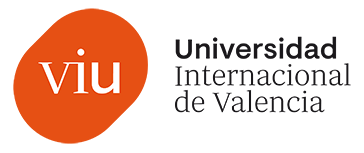



---
---

## **PARTE 1** - Instalación y requisitos previos

> Las prácticas han sido preparadas para poder realizarse en el entorno de trabajo de Google Colab. Sin embargo, esta plataforma presenta ciertas incompatibilidades a la hora de visualizar la renderización en gym. Por ello, para obtener estas visualizaciones, se deberá trasladar el entorno de trabajo a local. Por ello, el presente dosier presenta instrucciones para poder trabajar en ambos entornos. Siga los siguientes pasos para un correcto funcionamiento:
1.   **LOCAL:** Preparar el enviroment, siguiendo las intrucciones detalladas en la sección *1.1.Preparar enviroment*.
2.  **AMBOS:** Modificar las variables "mount" y "drive_mount" a la carpeta de trabajo en drive en el caso de estar en Colab, y ejecturar la celda *1.2.Localizar entorno de trabajo*.
3. **COLAB:** se deberá ejecutar las celdas correspondientes al montaje de la carpeta de trabajo en Drive. Esta corresponde a la sección *1.3.Montar carpeta de datos local*.
4.  **AMBOS:** Instalar las librerías necesarias, siguiendo la sección *1.4.Instalar librerías necesarias*.


---
### 1.1. Preparar enviroment (solo local)



> Para preparar el entorno de trabajo en local, se han seguido los siguientes pasos:
1. En Windows, puede ser necesario instalar las C++ Build Tools. Para ello, siga los siguientes pasos: https://towardsdatascience.com/how-to-install-openai-gym-in-a-windows-environment-338969e24d30.
2. Instalar Anaconda
3. Siguiendo el código que se presenta comentado en la próxima celda: Crear un enviroment, cambiar la ruta de trabajo, e instalar librerías básicas.


```
conda create --name miar_rl python=3.8
conda activate miar_rl
cd "PATH_TO_FOLDER"
conda install git
pip install jupyter
```


4. Abrir la notebook con *jupyter-notebook*.



```
jupyter-notebook
```


---
### 1.2. Localizar entorno de trabajo: Google colab o local

In [ ]:
# ATENCIÓN!! Modificar ruta relativa a la práctica si es distinta (drive_root)
mount='/content/gdrive'
drive_root = mount + "/My Drive/08_MIAR/actividades/proyecto practico"

try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

---
### 1.3. Montar carpeta de datos local (solo Colab)

In [ ]:
# Switch to the directory on the Google Drive that you want to use
import os
if IN_COLAB:
  print("We're running Colab")

  if IN_COLAB:
    # Mount the Google Drive at mount
    print("Colab: mounting Google drive on ", mount)

    drive.mount(mount)

    # Create drive_root if it doesn't exist
    create_drive_root = True
    if create_drive_root:
      print("\nColab: making sure ", drive_root, " exists.")
      os.makedirs(drive_root, exist_ok=True)

    # Change to the directory
    print("\nColab: Changing directory to ", drive_root)
    %cd $drive_root
# Verify we're in the correct working directory
%pwd
print("Archivos en el directorio: ")
print(os.listdir())

We're running Colab
Colab: mounting Google drive on  /content/gdrive
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

Colab: making sure  /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico  exists.

Colab: Changing directory to  /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico
/content/gdrive/My Drive/08_MIAR/actividades/proyecto practico
Archivos en el directorio: 
['dqn_last_weights.h5', 'model.png', 'training_metrics.csv', 'Videos']


---
### 1.4. Instalar librerías necesarias

**Importante!** Cuidado con las versiones actualizadas de ciertas librerias, es recomendable utilizar las versiones deprecadas en ciertos casos para asegurar la compatibilidad entre módulos

In [ ]:
if IN_COLAB:
  %pip install gym==0.17.3
  %pip install numpy==1.23.5
  # %pip install numpy==1.24.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install keras-rl2==1.0.5
  %pip install tensorflow==2.12.1
else:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install pyglet==1.5.0
  %pip install h5py==3.1.0
  %pip install Pillow==9.5.0
  %pip install keras-rl2==1.0.5
  %pip install Keras==2.2.4
  %pip install tensorflow==2.5.3
  %pip install torch==2.0.1
  %pip install agents==1.4.0

  Cloning https://github.com/Kojoley/atari-py.git to /tmp/pip-req-build-2iolxr31
  Running command git clone --filter=blob:none --quiet https://github.com/Kojoley/atari-py.git /tmp/pip-req-build-2iolxr31
  Resolved https://github.com/Kojoley/atari-py.git to commit 86a1e05c0a95e9e6233c3a413521fdb34ca8a089
  Preparing metadata (setup.py) ... done
  Created wheel for atari-py: filename=atari_py-1.2.2-cp311-cp311-linux_x86_64.whl size=4738555 sha256=6cfa006bec94c99a1f70536af5501834ac564af689ba2a3b11592a523a527310
  Stored in directory: /tmp/pip-ephem-wheel-cache-65h3289w/wheels/1a/58/b3/3baab9d1509939ecce2dfd9ca349c222b7ee6590f4bd6097a1
Successfully built atari-py
  Using cached keras_rl2-1.0.5-py3-none-any.whl.metadata (304 bytes)
  Using cached numpy-2.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 69.3 MB/s eta 0:00:00
  

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 74.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 MB 10.0 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.

In [ ]:
!pip install opencv-python==4.10.0.82
!pip install pydot==2.0.0
!pip install graphviz==0.20.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 10.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.11.0.86
    Uninstalling opencv-python-4.11.0.86:
      Successfully uninstalled opencv-python-4.11.0.86
  Attempting uninstall: pydot
    Found existing installation: pydot 3.0.4
    Uninstalling pydot-3.0.4:
      Successfully uninstalled pydot-3.0.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.21
    Uninstalling graphviz-0.21:
      Successfully uninstalled graphviz-0.21


---
---

## **PARTE 2**. Enunciado

Consideraciones a tener en cuenta:

- El entorno sobre el que trabajaremos será _SpaceInvaders-v0_ y el algoritmo que usaremos será _DQN_.

- Para nuestro ejercicio, el requisito mínimo será alcanzado cuando el agente consiga una **media de recompensa por encima de 20 puntos en modo test**. Por ello, esta media de la recompensa se calculará a partir del código de test en la última celda del notebook.

Este proyecto práctico consta de tres partes:

1.   Implementar la red neuronal que se usará en la solución
2.   Implementar las distintas piezas de la solución DQN
3.   Justificar la respuesta en relación a los resultados obtenidos

**Rúbrica**: Se valorará la originalidad en la solución aportada, así como la capacidad de discutir los resultados de forma detallada. El requisito mínimo servirá para aprobar la actividad, bajo premisa de que la discusión del resultado sera apropiada.

IMPORTANTE:

* Si no se consigue una puntuación óptima, responder sobre la mejor puntuación obtenida.
* Para entrenamientos largos, recordad que podéis usar checkpoints de vuestros modelos para retomar los entrenamientos. En este caso, recordad cambiar los parámetros adecuadamente (sobre todo los relacionados con el proceso de exploración).
* Se deberá entregar unicamente el notebook y los pesos del mejor modelo en un fichero .zip, de forma organizada.
* Cada alumno deberá de subir la solución de forma individual.

---
---

## **PARTE 3**. Configuración Inicial y Pre-Procesado

#### 3.1 Importar librerías

In [171]:
from __future__ import division

from PIL import Image
import numpy as np
import gym

# De Keras
from keras import Model
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Flatten, Convolution2D, Permute, InputLayer, Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Lambda, UpSampling2D, Input, Resizing, Reshape
from keras.optimizers import Adam
import keras.backend as K

# De RL
from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint

# Otras librerias
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import Callback
import math
from collections import deque
import csv
from gym import wrappers
import io
import base64
from IPython.display import HTML

### 3.2 Pre-procesamiento personalizado del Entorno (DUDA)

Implementamos una clase `FrameAverageWrapper`, que extiende el entorno original de gym para aplicar un preprocesamiento específico a las observaciones visuales del agente. Esta clase:

*   **Promedia múltiples frames consecutivos** para generar una imagen más estable, reduciendo el ruido visual entre frames (similar al frame stacking, pero suavizado).
*   **Recorta la imagen** para eliminar zonas irrelevantes del entorno (por ejemplo, márgenes vacíos).

*   **Modifica colores** específicos de píxeles:

  - Sustituye el número de **puntuación** por negro ([162,134,56] → [0,0,0]).

  - Cambia el color de las **balas** para resaltarlas ([142,142,142] → [255,255,255]).

Este preprocesamiento ayuda al agente a centrarse en elementos relevantes como enemigos y proyectiles, y a evitar distracciones del interfaz gráfico como marcadores o fondos.

In [172]:
class FrameAverageWrapper(gym.Wrapper):
  def __init__(self, env, num_frames=4):
    super(FrameAverageWrapper, self).__init__(env)
    self.num_frames = num_frames
    self.frames = []

  def reset(self):
    obs = self._preprocess_observation(self.env.reset())
    self.frames = [obs] * self.num_frames
    return self._get_average_frame()

  def step(self, action):
    obs, reward, done, info = self.env.step(action)
    self.frames.append(self._preprocess_observation(obs))
    if len(self.frames) > self.num_frames:
      self.frames.pop(0)
    return self._get_average_frame(), reward, done, info

  def _get_average_frame(self):
    return np.mean(np.array(self.frames), axis=0).astype(np.uint8)

  def _crop_observation(self, obs):
    return obs[25:195]

  def _change_colors(self, obs, original_color, target_color):
    mask = np.all(obs == original_color, axis=-1)
    obs[mask] = target_color
    return obs

  def _remove_number_observation(self, obs):
    return self._change_colors(obs, [162, 134, 56], [0, 0, 0])

  def _change_bullet_color(self, obs):
    return self._change_colors(obs, [142, 142, 142], [255, 255, 255])

  def _preprocess_observation(self, obs):
    obs = self._crop_observation(obs)
    obs = self._remove_number_observation(obs)
    obs = self._change_bullet_color(obs)
    return obs

### 3.3 Configuración Base

In [173]:
INPUT_SHAPE = (84, 84)
WINDOW_LENGTH = 1 # podemos probar con 4

env_name = 'SpaceInvaders-v0'
env = gym.make(env_name)

np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

In [174]:
env = FrameAverageWrapper(env)

In [175]:
print(env.unwrapped.get_action_meanings())

['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']


#### 1. Setteamos los hiperparámetros

In [176]:
# Hiperparametros de la red
LEARNING_RATE = 0.000005 # 0.000025

# Hiperparametros del agente
GAMMA = 0.95                  # Factor de descuento para las recompensas futuras. Controla cuánto peso se le da a las recompensas futuras
                              # en comparación con las inmediatas.
TARGET_MODEL_UPDATE = 1000    # Frecuencia con la que se actualiza el modelo objetivo
TRAIN_INTERVAL = 24            # determina cada cuántos pasos se entrena la red
DELTA_CLIP = 1.0              # Valor utilizado para recortar los errores TD (diferencia temporal) durante el entrenamiento para evitar
                              # fluctuaciones extremas.

WARM_UP = 1000                # steps de calentamiento antes de comenzar a medir en el training

In [177]:
hyperparameters = {
  "INPUT_SHAPE": INPUT_SHAPE,
  "WINDOW_LENGTH": WINDOW_LENGTH,
  "LEARNING_RATE": LEARNING_RATE,
  "GAMMA": GAMMA,
  "TARGET_MODEL_UPDATE": TARGET_MODEL_UPDATE,
  "TRAIN_INTERVAL": TRAIN_INTERVAL,
  "DELTA_CLIP": DELTA_CLIP
}

# Nombre del archivo CSV
csv_file = 'hiperparametros.csv'

# Escribir los hiperparámetros en el archivo CSV
with open(csv_file, mode='w', newline='') as file:
  writer = csv.writer(file)
  writer.writerow(['Nombre', 'Valor'])
  for key, value in hyperparameters.items():
    writer.writerow([key, value])

#### 2. Creamos el procesador de observaciones y recompensas personalizado

sE HAN PROBADO 2 MODELOS DE PROCESADOR:

Se define una clase `AtariProcessor`, que hereda de `rl.core.Processor`, para personalizar cómo se procesan las observaciones, recompensas e información del entorno antes de ser entregadas al agente DQN. Sus funciones clave son:

* **`process_observation`**: convierte cada frame en escala de grises, lo redimensiona a la forma esperada `(84, 84)` y lo transforma a formato `uint8`, reduciendo la complejidad visual.

* **`process_state_batch`**: normaliza los datos por lotes dividiendo entre 255, lo que mejora la estabilidad del entrenamiento.

* **`process_info`**: guarda el número de vidas restantes (`'ale.lives'`), útil para detectar cuándo el agente muere.

* **`process_reward`**: redefine la señal de recompensa para facilitar el aprendizaje:

  * +1 si elimina un enemigo.
  * −4 si pierde una vida.
  * +0.1 si el agente se mantiene en movimiento (evita quedarse estático).

  Esta recompensa modificada fomenta comportamientos útiles y penaliza inactividad o errores.

De esta forma, este nuevo procesador personalizado proporciona un control más fino sobre la dinámica de entrenamiento que el que se nos daba de base, haciendo que el agente aprenda comportamientos más efectivos y específicos para el entorno.

In [178]:
class AtariProcessor(Processor):

  def __init__(self):
    self.actual_lives = None
    self.last_lives = None

    self.actual_obs = None
    self.last_obs = None

  def process_observation(self, observation):
    assert observation.ndim == 3  # (height, width, channel)
    img = Image.fromarray(observation)
    img = img.resize(INPUT_SHAPE).convert('L')
    processed_observation = np.array(img)
    assert processed_observation.shape == INPUT_SHAPE

    self.actual_obs = observation
    return processed_observation.astype('uint8')

  def process_state_batch(self, batch):
    processed_batch = batch.astype('float32') / 255.
    return processed_batch

  def process_info(self, info):
    if 'ale.lives' in info:
      self.last_lives = self.actual_lives
      self.actual_lives = info['ale.lives']
    return info

  def process_reward(self, reward):
    recompensa_kill = 1 if reward > 0 else 0

    penalizacion_muerte = 0

    penalizacion_muerte = -4 if self.last_lives and self.actual_lives < self.last_lives else 0

    recompensa_total = recompensa_kill + penalizacion_muerte + self._process_move_rewad()

    return recompensa_total

  def _process_move_rewad(self):
    recompensa = 0

    if (self.last_obs is not None and np.allclose(self.actual_obs, self.last_obs)):
      recompensa = 0.1

    self.last_obs = self.actual_obs
    return recompensa

Este de abajo es el CORRECTO

In [179]:
class AtariProcessor(Processor):

  def process_observation(self, observation):
      assert observation.ndim == 3  # (height, width, channel)
      img = Image.fromarray(observation)
      img = img.resize(INPUT_SHAPE).convert('L')
      processed_observation = np.array(img)

      assert processed_observation.shape == INPUT_SHAPE
      return processed_observation.astype('uint8')

  def process_state_batch(self, batch):
      processed_batch = batch.astype('float32') / 255.
      return processed_batch

  def process_reward(self, reward):
      return np.clip(reward, -1., 1.)

In [180]:
print("Numero de acciones disponibles: " + str(nb_actions))

Numero de acciones disponibles: 6


In [181]:
print("Formato de las observaciones:")
env.observation_space

Formato de las observaciones:


Box(0, 255, (210, 160, 3), uint8)

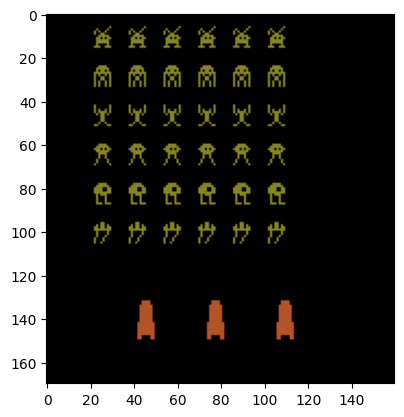

In [182]:
obs = env.reset()
plt.imshow(obs)
plt.show()

In [183]:
def preprocess_observation(obs):
    # Convertir a escala de grises
    gray = cv2.cvtColor(obs, cv2.COLOR_RGB2GRAY)
    # Redimensionar la imagen a (84, 84)
    resized = cv2.resize(gray, (INPUT_SHAPE), interpolation=cv2.INTER_AREA)
    # Normalizar la imagen (opcional)
    normalized = resized / 255.0
    # Añadir una dimensión para el canal
    processed_obs = np.expand_dims(normalized, axis=-1)
    return processed_obs

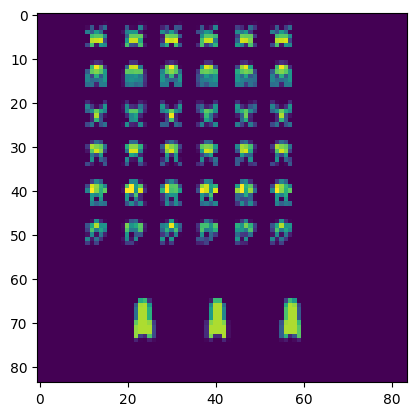

In [184]:
processed_obs = preprocess_observation(obs)
plt.imshow(processed_obs)
plt.show()

### 3.4 Implementación de la red neuronal

### 3.4.1 Desarrollo VAE

#### 3.4.1.1 Creción del dataset

Para generar las imágenes con las que se va a entrenar al modelo VAE se va a posicionar al agente en determinadas posiciones, y a partir de ahí se ejecutarán acciones aleatorias. Situar al agente en posiciones determinadas al comienzo de cada episodio ayuda a generar un espacio de observaciones más variado.

In [185]:
obs = env.reset()
done = False

tipo_accion = [
    np.random.randint(nb_actions, size=5000),
    np.concatenate((np.full((45), 2, dtype=int), np.random.randint(nb_actions, size=5000)), axis=0),
    np.concatenate((np.full((50), 2, dtype=int), np.random.randint(nb_actions, size=5000)), axis=0),
    np.concatenate((np.full((55), 2, dtype=int), np.random.randint(nb_actions, size=5000)), axis=0),
    np.concatenate((np.full((60), 2, dtype=int), np.random.randint(nb_actions, size=5000)), axis=0),
    np.concatenate((np.full((65), 2, dtype=int), np.random.randint(nb_actions, size=5000)), axis=0),
    np.concatenate((np.full((70), 2, dtype=int), np.random.randint(nb_actions, size=5000)), axis=0),
    np.concatenate((np.full((75), 2, dtype=int), np.random.randint(nb_actions, size=5000)), axis=0),
    np.concatenate((np.full((80), 2, dtype=int), np.random.randint(nb_actions, size=5000)), axis=0),
    np.concatenate((np.full((85), 2, dtype=int), np.random.randint(nb_actions, size=5000)), axis=0),
    np.concatenate((np.full((90), 2, dtype=int), np.random.randint(nb_actions, size=5000)), axis=0),
    np.concatenate((np.full((95), 2, dtype=int), np.random.randint(nb_actions, size=5000)), axis=0),
    np.concatenate((np.full((100), 2, dtype=int), np.random.randint(nb_actions, size=5000)), axis=0)
]

lista_obs = []

for tipo in tipo_accion:
  for accion in tipo:
    new_obs, reward, done, info = env.step(accion)

    lista_obs.append(new_obs)

    if done == True:
      obs = env.reset()
      break

print('Observation list size:', len(lista_obs))

Observation list size: 8236


In [186]:
def preprocess_img(images):
  images = images.astype('float32') / 255

  images = tf.image.rgb_to_grayscale(images)

  images = tf.image.resize(images, [84, 84])

  return images

preprocessed_images = preprocess_img(np.array(lista_obs[:500]))

print(preprocessed_images.shape)

(500, 84, 84, 1)


In [187]:
dataset = tf.data.Dataset.from_tensor_slices(preprocessed_images)
dataset = dataset.shuffle(buffer_size = 1000).batch(64).prefetch(tf.data.AUTOTUNE)

#### 3.4.1.2 Implementación de la red neuronal a entrenar con VAE

La arquitectura de la red neuronal utilizada en el VAE es sencilla. El encoder está formado por tres capas convolucionales, cada una seguida de una operación de max pooling que reduce progresivamente las dimensiones espaciales de la imagen.

A continuación, el resultado se aplana y se pasa por una capa densa que genera dos salidas: el vector de medias y el de varianzas. A partir de estos vectores se realiza una operación de muestreo para obtener el vector latente que representa la codificación compacta de la imagen.

El decoder toma este vector latente como entrada, lo pasa por una capa densa y reorganiza la salida en forma de matriz. Después, se aplican tres bloques convolucionales, cada uno compuesto por una operación de up sampling seguido de una capa convolucional. Así se consigue reconstruir la imagen original a partir de esa representación latente.

In [188]:
LATENT_DIM = 32

def sampling(args):
  z_mean, z_log_var = args
  eps = tf.random.normal(shape=(tf.shape(z_mean)[0], LATENT_DIM))
  return z_mean + tf.exp(0.5 * z_log_var) * eps

In [189]:
def build_encoder():
  inputs = Input(shape=(84, 84, 1))

  x = Conv2D(32, 3, padding='same', activation='relu')(inputs)
  x = MaxPooling2D((2, 2))(x)

  x = Conv2D(64, 3, padding='same', activation='relu')(x)
  x = MaxPooling2D((2, 2))(x)

  x = Conv2D(128, 3, padding='same', activation='relu')(x)
  x = MaxPooling2D((2, 2))(x)

  x = Flatten()(x)
  x = Dense(128, activation='relu')(x)

  z_mean = Dense(LATENT_DIM)(x)
  z_log_var = Dense(LATENT_DIM)(x)

  z = Lambda(sampling)([z_mean, z_log_var])

  return Model(inputs, [z_mean, z_log_var, z], name="encoder")

In [190]:
def build_decoder():
  latent_inputs = Input(shape=(LATENT_DIM,))

  x = Dense(10 * 10 * 128, activation='relu')(latent_inputs)
  x = Reshape((10, 10, 128))(x)

  x = UpSampling2D(size=(2, 2))(x)
  x = Conv2D(64, 3, padding='same', activation='relu')(x)

  x = UpSampling2D(size=(2, 2))(x)
  x = Conv2D(32, 3, padding='same', activation='relu')(x)

  x = UpSampling2D(size=(2, 2))(x)
  x = Conv2D(16, 3, padding='same', activation='relu')(x)

  x = Resizing(84, 84)(x)

  output = Conv2D(1, 3, padding='same', activation='sigmoid')(x)

  return Model(latent_inputs, output, name='decoder')

In [194]:
class VAE(Model):
  def __init__(self, encoder, decoder):
    super().__init__()
    self.encoder = encoder
    self.decoder = decoder

  def train_step(self, data):
    x = data  # data = batch de imágenes
    with tf.GradientTape() as tape:
      z_mean, z_log_var, z = self.encoder(x)
      x_recon = self.decoder(z)

      # Pérdida de reconstrucción
      recon_loss = tf.reduce_sum(
          tf.keras.losses.binary_crossentropy(x, x_recon), axis=(1, 2)
      )

      # KL Divergence
      kl_loss = -0.5 * tf.reduce_sum(
          1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1
      )

      total_loss = tf.reduce_mean(recon_loss + kl_loss)

    grads = tape.gradient(total_loss, self.trainable_weights)
    self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
    return {"loss": total_loss}

In [195]:
# Construir y compilar
encoder = build_encoder()
decoder = build_decoder()
vae = VAE(encoder, decoder)
vae.compile(optimizer='adam')

In [196]:
# Entrenamiento
vae.fit(dataset, epochs=20)

ValueError: The model cannot be compiled because it has no loss to optimize.

In [ ]:
encoder.save("encoder.h5")
encoder.save_weights("encoder_weights.h5")

decoder.save("decoder.h5")
decoder.save_weights("decoder_weights.h5")

vae.save_weights("vae_weights.h5")

In [ ]:
encoder_model = load_model("/encoder.h5")
decoder_model = load_model("/decoder.h5")

In [ ]:
tf.squeeze(img)

<tf.Tensor 'Squeeze_3:0' shape=(84, 84) dtype=float32>

AttributeError: 'Tensor' object has no attribute 'numpy'

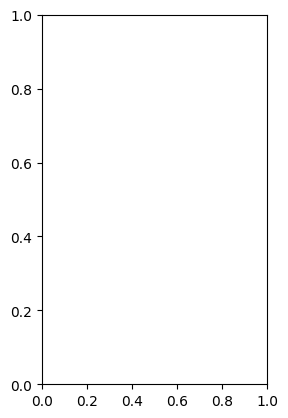

In [ ]:
img = preprocessed_images[3]  # por ejemplo
img = tf.expand_dims(img, axis=0)  # (1, 84, 84, 1)
z_mean, z_log_var, z = encoder_model(img)
recon = decoder_model(z)  # Usa el vector latente como entrada

import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.imshow(tf.squeeze(img).numpy(), cmap="gray")
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(tf.squeeze(recon), cmap="gray")
plt.title("Reconstruida")

plt.show()

Se define una arquitectura basada en un modelo preentrenado (encoder_model), del cual se reutilizan ciertas capas. Primero se establece una capa de entrada con forma (84, 84, 1), seguida de una reorganización de ejes mediante Permute.

A continuación, se incorporan las **dos primeras capas del encoder preentrenado en modo congelado** (no entrenables), y posteriormente otras capas seleccionadas que sí se ajustarán durante el entrenamiento. Finalmente, se aplica una capa de GlobalAveragePooling2D para reducir la dimensionalidad y una capa Dense lineal como salida, que devuelve los valores Q correspondientes a cada acción posible.

In [ ]:
def create_dqn_model(input_shape, num_actions):
    model = Sequential()

    # Input layer: process input shape
    model.add(InputLayer(input_shape=(input_shape[0], input_shape[1], input_shape[2]))) #(84, 84, 1)

    # Permute layer to reorganize dimensions from (height, width, channels*4) to (channels*4, height, width)
    model.add(Permute((2, 3, 1)))

    for layer in encoder_model.layers[1:5]:
      layer.trainable = False
      model.add(layer)

    for layer in encoder_model.layers[5:7]:
      layer.trainable = True
      model.add(layer)

    model.add(GlobalAveragePooling2D())
    model.add(Dense(num_actions, activation='linear'))

    return model

In [ ]:
input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE
num_actions = nb_actions # 6  Número de acciones posibles en Space Invaders

model = create_dqn_model(input_shape, num_actions)

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 permute_4 (Permute)         (None, 84, 84, 1)         0         
                                                                 
 conv2d_27 (Conv2D)          (None, 84, 84, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 42, 42, 32)       0         
 2D)                                                             
                                                                 
 conv2d_28 (Conv2D)          (None, 42, 42, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 21, 21, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 21, 21, 128)      

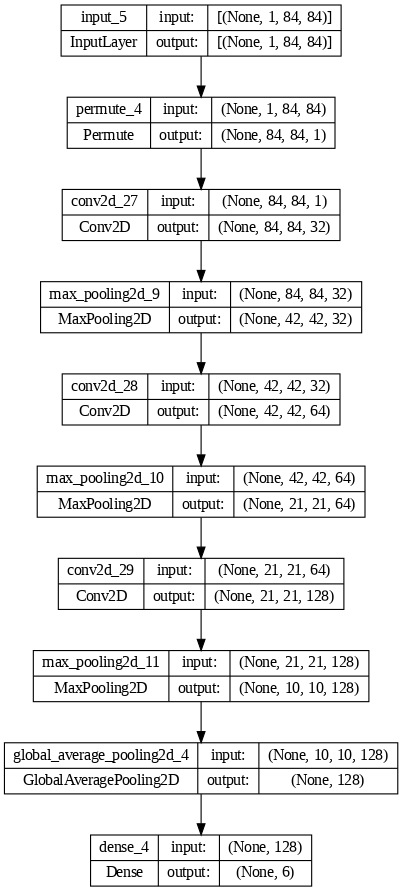

In [ ]:
plot_model(model,show_shapes=True, dpi=80)

### 3.4 Implementación de la solución DQN

In [ ]:
memory = SequentialMemory(limit=1000000, window_length=WINDOW_LENGTH)

In [ ]:
processor = AtariProcessor()

#### Seleccionamos la policy a emplear:

In [ ]:
policy = EpsGreedyQPolicy(0.2) # 0.2
# policy = GreedyQPolicy()

In [ ]:
dqn = DQNAgent(
    model=model,
    nb_actions=num_actions,
    policy=policy,
    memory=memory,
    processor=processor,
    nb_steps_warmup = WARM_UP,
    gamma=GAMMA,
    target_model_update = TARGET_MODEL_UPDATE,
    train_interval = TRAIN_INTERVAL,
    delta_clip = DELTA_CLIP
)

optimizer = Adam(learning_rate = LEARNING_RATE)
dqn.compile(optimizer=optimizer, metrics=['mae'])

#### Guardamos sus pesos y métricas

Creamos las clases de guardado de pesos: [dqn_best_wieghts, dqn_last_weights]

Y de sus métricas de entrenamiento: [training_metrics]

In [ ]:
class SaveBestWeights(Callback):
    def __init__(self, filepath, interval=20, overwrite=True):
        super(SaveBestWeights, self).__init__()
        self.filepath = filepath
        self.interval = interval
        self.best_reward = -float('inf')
        self.overwrite = overwrite

    def on_episode_end(self, episode, logs={}):
        if episode % self.interval == 0:
            current_reward = logs.get('episode_reward')
            if current_reward > self.best_reward:
                self.best_reward = current_reward
                #self.model.save_weights(self.filepath)
                #print(f'Pesos guardados en {self.filepath} recompensa: {self.best_reward}')
                if self.overwrite or not os.path.exists(self.filepath):
                    self.model.save_weights(self.filepath, overwrite=True)
                    print(f'Pesos guardados en {self.filepath} recompensa: {self.best_reward}')
                else:
                    print(f'Warning: No se sobrescribió {self.filepath}, ya existe.')

In [ ]:
filepath = 'dqn_best_weights.h5'
save_best_weights = SaveBestWeights(filepath=filepath, interval=1, overwrite=True)

In [ ]:
class SaveLastWeights(Callback):
    def __init__(self, filepath, interval=10):
        super(SaveLastWeights, self).__init__()
        self.filepath = filepath
        self.interval = interval

    def on_episode_end(self, episode, logs={}):
        if episode % self.interval == 0:
            self.model.save_weights(self.filepath, overwrite=True)
            print(f'Pesos guardados en {self.filepath} al final del episodio {episode}')

In [ ]:
filepathlw = 'dqn_last_weights.h5'

save_last_weights = SaveLastWeights(filepath=filepathlw, interval=10)

In [ ]:
class MetricsLogger(Callback):
    def __init__(self, filepath):
        self.filepath = filepath
        with open(self.filepath, mode='w') as file:
            writer = csv.writer(file)
            writer.writerow(['episode', 'reward', 'steps'])

    def on_episode_end(self, episode, logs={}):
        reward = logs.get('episode_reward')
        steps = logs.get('nb_episode_steps')

        with open(self.filepath, mode='a') as file:
            writer = csv.writer(file)
            writer.writerow([episode, reward, steps])

In [ ]:
metrics_logger = MetricsLogger('training_metrics.csv')

#### Añadimos el EarlyStopping por recompensas alcanzadas (si se llega al reward threshold)

In [ ]:
class EarlyStoppingByReward(Callback):
    def __init__(self, reward_threshold, patience):
        super(EarlyStoppingByReward, self).__init__()
        self.reward_threshold = reward_threshold
        self.patience = patience
        self.recent_rewards = deque(maxlen=patience)

    def on_episode_end(self, episode, logs={}):
        current_reward = logs.get('episode_reward')
        self.recent_rewards.append(current_reward)

        if len(self.recent_rewards) == self.patience and all(r > self.reward_threshold for r in self.recent_rewards):
            self.model.stop_training = True
            print(f'Detener el entrenamiento al exceder la recompensa media {self.reward_threshold} en {self.patience} episodios')

In [ ]:
early_stopping = EarlyStoppingByReward(reward_threshold=20, patience=10)

In [ ]:
log_filename = 'dqn_{}_log.json'.format(env_name)

In [ ]:
if os.path.exists(filepathlw):
    print(f'Cargamos los pesos de {filepathlw}')
    dqn.load_weights(filepathlw)
else:
    print('No hay un fichero de pesos, entrenando la red desde cero')

Cargamos los pesos de dqn_last_weights.h5


## **PARTE 4**. Entrenamiento de la red

Se entrena el agente DQN durante 500.000 pasos utilizando el entorno SpaceInvaders-v0. El entrenamiento se realiza sin visualización y con registro periódico de métricas cada 10.000 pasos. Además, se emplean las diversas funciones de callback definidas previamente que permiten controlar y registrar el proceso de entrenamiento:

- **save_best_weights**: guarda los pesos del modelo cuando se obtiene el mejor rendimiento.

- **save_last_weights**: guarda los pesos al final del entrenamiento.

- **metrics_logger**: registra las métricas de evolución del entrenamiento.

- **early_stopping**: permite detener el entrenamiento anticipadamente si no hay mejora tras cierto umbral.

- **FileLogger**: almacena los resultados en un archivo de log para análisis posterior.

In [ ]:
#dqn.fit(env, nb_steps=1000000, visualize=False, verbose=2, callbacks=[save_best_weights, early_stopping])
train_scores = dqn.fit(
    env,
    nb_steps=100000,
    visualize=False,
    verbose=2,
    log_interval=10000,
    callbacks=[
        save_best_weights,
        save_last_weights,
        metrics_logger,
        early_stopping,
        FileLogger(
            log_filename,
            interval=100)
        ]
    )

Training for 100000 steps ...


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Pesos guardados en dqn_best_weights.h5 recompensa: 5.0
Pesos guardados en dqn_last_weights.h5 al final del episodio 0
   684/100000: episode: 1, duration: 3.861s, episode steps: 684, steps per second: 177, episode reward:  5.000, mean reward:  0.007 [ 0.000,  1.000], mean action: 0.395 [0.000, 5.000],  loss: --, mae: --, mean_q: --


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Pesos guardados en dqn_best_weights.h5 recompensa: 13.0
  2187/100000: episode: 2, duration: 24.681s, episode steps: 1503, steps per second:  61, episode reward: 13.000, mean reward:  0.009 [ 0.000,  1.000], mean action: 0.510 [0.000, 5.000],  loss: 0.004179, mae: 0.068959, mean_q: 0.096927
  2807/100000: episode: 3, duration: 11.117s, episode steps: 620, steps per second:  56, episode reward:  2.000, mean reward:  0.003 [ 0.000,  1.000], mean action: 0.548 [0.000, 5.000],  loss: 0.005080, mae: 0.065902, mean_q: 0.092973
  3419/100000: episode: 4, duration: 13.233s, episode steps: 612, steps per second:  46, episode reward:  4.000, mean reward:  0.007 [ 0.000,  1.000], mean action: 0.391 [0.000, 5.000],  loss: 0.006334, mae: 0.067114, mean_q: 0.095262
  4336/100000: episode: 5, duration: 15.959s, episode steps: 917, steps per second:  57, episode reward:  6.000, mean reward:  0.007 [ 0.000,  1.000], mean action: 0.551 [0.000, 5.000],  loss: 0.005806, mae: 0.067068, mean_q: 0.096185
  5

## **PARTE 5**. Test de Resultados del Modelo

### 5.1 Configuración y logger de las acciones

In [ ]:
from gym import wrappers
import io
import base64
from IPython.display import HTML

In [ ]:
class Logger_test(Callback):
    def __init__(self):
        self.episode_actions = []

    def on_episode_begin(self, episode, logs={}):
        self.current_actions = []

    def on_action_end(self, action, logs={}):
        self.current_actions.append(action)

    def on_episode_end(self, episode, logs={}):
        self.episode_actions.append(self.current_actions)
        print(f"Acciones del episodio {episode}: {self.current_actions}")

logger = Logger_test()

In [ ]:
env.close()

In [ ]:
env = wrappers.Monitor(env, "./Videos", force=True) # Para guardar los videos de las partidas
                                                    # necesario instalar ffmpeg

### 5.2 Fase de Test para calcular la Recompensa Media

Cargamos los ultimos pesos obtenidos en el entrenamiento y procedemos a testearlos en un set de N episodios:

In [ ]:
# Testing part to calculate the mean reward
weights_filename = 'dqn_last_weights.h5'

# Cargamos los pesos en la DQN y calculamos las test scores obtenidas en N episodios
dqn.load_weights(weights_filename)
test_scores = dqn.test(env, nb_episodes=10, visualize=False, callbacks=[logger])

Testing for 10 episodes ...


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Acciones del episodio 0: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

Calculamos la recompensa media de esos N episodios, buscando obtener un resultado >20 puntos:

In [ ]:
episode_rewards = test_scores.history['episode_reward']
print(int(np.min(episode_rewards)), "~", int(np.max(episode_rewards)), "Mean", np.mean(episode_rewards))

18 ~ 26 Mean 21.7


Visualizamos en formato video la partida:

In [ ]:
video = io.open('./Videos/openaigym.video.%s.video000000.mp4' % env.file_infix, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''
    <video width="360" height="auto" alt="test" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''
.format(encoded.decode('ascii')))

# DE AQUI HACIA ABAJO QUE PONEMOS? QUE QUITAMOS? CONECTAR EL GDRIVE DE JAIME Y VER QUE PODEMOS PLOTEAR

### 5.3 Justificación de los parámetros seleccionados y de los resultados obtenidos

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def plot_experiments_json(experiments, fields_to_plot):
    # Colores para los experimentos
    colors = plt.cm.viridis(np.linspace(0, 1, len(experiments)))

    # Leer datos de los archivos json
    data = {}
    for name, path in experiments.items():
        with open(path, 'r') as f:
            data[name] = json.load(f)

    # Convertir los datos a DataFrame
    dfs = {name: pd.DataFrame(experiment_data) for name, experiment_data in data.items()}

    # Configurar subplots en función de la cantidad de campos
    n_fields = len(fields_to_plot)
    if n_fields == 6:
        fig, axs = plt.subplots(3, 2, figsize=(15, 20))
    elif n_fields == 3:
        fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    elif n_fields == 1:
        fig, axs = plt.subplots(1, 1, figsize=(15, 5))
        axs = np.array([axs])  # Convertir a array para la iteración

    fig.subplots_adjust(hspace=0.5, wspace=0.3)

    # Graficar cada campo
    for i, field in enumerate(fields_to_plot):
        ax = axs[i // 2, i % 2] if n_fields == 6 else axs[i]  # Ubicación del subplot
        for (name, df), color in zip(dfs.items(), colors):
            if field in df.columns:
                ax.plot(df[field], label=name, color=color)
        ax.set_xlabel("Timestep")
        ax.set_ylabel(field)
        ax.set_title(field)
        ax.legend()
        ax.grid(True)

    # Ajustar el layout y mostrar la figura
    plt.tight_layout()
    plt.show()

In [ ]:
video = io.open('./Video_procesado_red/video_procesado_red.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''
    <video width="360" height="auto" alt="test" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''
.format(encoded.decode('ascii')))

TRAIN INTERVAL

In [ ]:
#fields_to_plot = ["loss", "mae", "mean_q", "episode_reward", "nb_episode_steps", "duration"]
fields_to_plot = ["loss", "mae", "mean_q"]
experiments = {
    "TRAIN_INTERVAL = 4": "./dqn_SpaceInvaders-v0_log.json",
    "TRAIN_INTERVAL = 24": "./dqn_SpaceInvaders-v0_log.json",
}
plot_experiments_json(experiments, fields_to_plot)

In [ ]:
fields_to_plot = ["episode_reward", "nb_episode_steps", "duration"]
experiments = {
    "TRAIN_INTERVAL = 4": "./dqn_SpaceInvaders-v0_log.json",
    "TRAIN_INTERVAL = 24": "./dqn_SpaceInvaders-v0_log.json",
}
plot_experiments_json(experiments, fields_to_plot)

LEARNING RATE

In [ ]:
fields_to_plot = ["loss", "mae", "mean_q"]
experiments = {
    "LR = 0.00001": "./dqn_SpaceInvaders-v0_log.json",
    "LR = 0.00005": "./dqn_SpaceInvaders-v0_log.json",
    "Ex_base LR = 0.00025": "./dqn_SpaceInvaders-v0_log.json",
    "LR = 0.00050": "./dqn_SpaceInvaders-v0_log.json",
    "LR = 0.00075": "./dqn_SpaceInvaders-v0_log.json",
    "LR = 0.00085": "./dqn_SpaceInvaders-v0_log.json",
    "LR = 0.001": "./dqn_SpaceInvaders-v0_log.json",
}
plot_experiments_json(experiments, fields_to_plot)

In [ ]:
fields_to_plot = ["loss", "mae", "mean_q"]
experiments = {
    "Ex_base LR = 0.00025": "./dqn_SpaceInvaders-v0_log.json",

    "LR = 0.00001": "./dqn_SpaceInvaders-v0_log.json",
    "LR = 0.00005": "./dqn_SpaceInvaders-v0_log.json",
    "LR = 0.0001": "./dqn_SpaceInvaders-v0_log.json",
    "LR = 0.00025": "./dqn_SpaceInvaders-v0_log.json",
    "LR = .00050": "./dqn_SpaceInvaders-v0_log.json",
    "LR = 0.00075": "./dqn_SpaceInvaders-v0_log.json",
    "LR = 0.00085": "./dqn_SpaceInvaders-v0_log.json",
    "LR = 0.0009": "./dqn_SpaceInvaders-v0_log.json",
    "LR = 0.001": "./dqn_SpaceInvaders-v0_log.json",
}
plot_experiments_json(experiments, fields_to_plot)

In [ ]:
fields_to_plot = ["loss", "mae", "mean_q"]
experiments = {
    "GAMMA = 0.01": "./dqn_SpaceInvaders-v0_log.json",
    "GAMMA = 0.50": "./dqn_SpaceInvaders-v0_log.json",
    "GAMMA = 0.75": "./dqn_SpaceInvaders-v0_log.json",
    "GAMMA = 0.85": "./dqn_SpaceInvaders-v0_log.json",
    "GAMMA = 0.95": "./dqn_SpaceInvaders-v0_log.json",
    "GAMMA = 0.97": "./dqn_SpaceInvaders-v0_log.json",
    "GAMMA = 0.98": "./dqn_SpaceInvaders-v0_log.json",
    "Ex_base GAMMA = 0.99": "./dqn_SpaceInvaders-v0_log.json",
}
plot_experiments_json(experiments, fields_to_plot)

In [ ]:
fields_to_plot = ["loss", "mae", "mean_q"]
experiments = {
    "Ex_base GAMMA = 0.99": "./dqn_SpaceInvaders-v0_log.json",
    "GAMMA = 0.01": "./dqn_SpaceInvaders-v0_log.json",
    "GAMMA = 0.50": "./dqn_SpaceInvaders-v0_log.json",
    "GAMMA = 0.75": "./dqn_SpaceInvaders-v0_log.json",
    "GAMMA = 0.95": "./dqn_SpaceInvaders-v0_log.json",
    "GAMMA = 0.97": "./dqn_SpaceInvaders-v0_log.json",
    "GAMMA = 0.98": "./dqn_SpaceInvaders-v0_log.json",
    "GAMMA = 0.99": "./dqn_SpaceInvaders-v0_log.json",

}
plot_experiments_json(experiments, fields_to_plot)

TARGET MODEL UPDATE

In [ ]:
fields_to_plot = ["loss", "mae", "mean_q"]
experiments = {
    "TMU = 10": "./dqn_SpaceInvaders-v0_log.json",
    "TMU = 100": "./dqn_SpaceInvaders-v0_log.json",
    "TMU = 1000": "./dqn_SpaceInvaders-v0_log.json",
    "Ex_base TMU = 10000": "./dqn_SpaceInvaders-v0_log.json",
    "TMU = 100000": "./dqn_SpaceInvaders-v0_log.json",
}
plot_experiments_json(experiments, fields_to_plot)

In [ ]:
fields_to_plot = ["loss", "mae", "mean_q"]
experiments = {
    "TMU = 1000": "./dqn_SpaceInvaders-v0_log.json",
    "Ex_base TMU = 10000": "./dqn_SpaceInvaders-v0_log.json",
    "TMU = 100000": "./dqn_SpaceInvaders-v0_log.json",
}
plot_experiments_json(experiments, fields_to_plot)

In [ ]:
fields_to_plot = ["loss", "mae", "mean_q"]
experiments = {
    "Ex_base TMU = 10000": "./dqn_SpaceInvaders-v0_log.json",
    "TMU = 100": "./dqn_SpaceInvaders-v0_log.json",
    "TMU = 1000": "./dqn_SpaceInvaders-v0_log.json",
    "TMU = 10000": "./dqn_SpaceInvaders-v0_log.json",
    "TMU = 100000": "./dqn_SpaceInvaders-v0_log.json",
}
plot_experiments_json(experiments, fields_to_plot)

INCERTIDUMBRE DE LOS ENTRENAMIENTOS

In [ ]:
fields_to_plot = ["loss", "mae", "mean_q"]
experiments = {
    "Exp_02": "./Exp_02/EXPERIMENTO_02.json",
    "Exp_02 Repetido": "./Exp_02_old/EXPERIMENTO_02.json",
}
plot_experiments_json(experiments, fields_to_plot)

EFECTO DE ENTRENAR MÁS TIEMPO

In [ ]:
fields_to_plot = ["loss", "mae", "mean_q"]
experiments = {
    "Exp_base - 21.4": "./Experimento_base/dqn_SpaceInvaders-v0_log.json",
    "Exp_02 - 20.3": "./Exp_02/EXPERIMENTO_02.json",
    "Exp_03 - 24.6": "./Exp_03/EXPERIMENTO_03.json",
    "Exp_04 - 16.0": "./Exp_04/EXPERIMENTO_04.json",
    "Exp_05 - 21.1": "./Exp_05/EXPERIMENTO_05.json",
    "Exp_06 - 17.0": "./Exp_06/EXPERIMENTO_06.json",
    "Exp_07 - 23.4": "./Exp_07/EXPERIMENTO_07.json",
    "Exp_08 - 14.1": "./Exp_08/EXPERIMENTO_08.json",
}
plot_experiments_json(experiments, fields_to_plot)

---

In [ ]:
from IPython.display import display, Markdown

# Texto del log copiado manualmente
log_simulado = """\
Epoch 1/15
129/129 [==============================] - 321s 2s/step - loss: 831.8094
Epoch 2/15
129/129 [==============================] - 336s 3s/step - loss: 627.1995
Epoch 3/15
129/129 [==============================] - 325s 3s/step - loss: 576.8950
Epoch 4/15
83/129 [==================>...........] - ETA: 1:52 - loss: 549.9047
"""

# Mostrarlo con formato de bloque de código, como si fuera salida real
display(Markdown(f"```\n{log_simulado}\n```"))


```
Epoch 1/15
129/129 [==============================] - 321s 2s/step - loss: 831.8094
Epoch 2/15
129/129 [==============================] - 336s 3s/step - loss: 627.1995
Epoch 3/15
129/129 [==============================] - 325s 3s/step - loss: 576.8950
Epoch 4/15
83/129 [==================>...........] - ETA: 1:52 - loss: 549.9047

```

In [ ]:
print('')

SyntaxError: unterminated string literal (detected at line 1) (ipython-input-130-3083315921.py, line 1)